#### Test final implementation of expo.py module

running similar test with new dataset - iowa liqors

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline
from prep import prep
from expo import expo

In [3]:
df = pd.read_csv('iowa_liquors.csv')

In [4]:
df.head()

,date,store_number,store_name,city,county,sales
0,2022-01-09,4129,Cyclone Liquors,Ames,STORY,3570.58
1,2022-01-16,4129,Cyclone Liquors,Ames,STORY,13461.98
2,2022-01-23,4129,Cyclone Liquors,Ames,STORY,12398.75
3,2022-01-30,4129,Cyclone Liquors,Ames,STORY,15761.38
4,2022-02-06,4129,Cyclone Liquors,Ames,STORY,14926.81


In [5]:
f_list = ['store_number','store_name','city','county']

In [6]:
df_prep = prep(df,'date','sales',f_list).df_ready
#df_prep = prep(df,'date','sales',f_list,fill_missing=False).df_ready


this is inside method, after serilazie function  Index(['store_number', 'store_name', 'city', 'county', 'date', 'srl_num',
       'index', 'sales'],
      dtype='object')
104 Does not contain a minimum of  24  observations
[2190, 'Central City 2', 'Des Moines', 'POLK']
100 Does not contain a minimum of  24  observations
[2648.0, 'Hy-Vee #4 / Wdm', 'West Des Moines', 'POLK']
102 Does not contain a minimum of  24  observations
[2663.0, 'Hy-Vee Food Store / Douglas', 'Urbandale', 'POLK']
103 Does not contain a minimum of  24  observations
[3814.0, 'Costco Wholesale #788', 'West Des Moines', 'Dallas']


/workspaces/exponential_smoothing/prep.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stage_df = stage_df.append(temp2,ignore_index=True)


In [7]:
df_prep.head()

,store_number,store_name,city,county,date,srl_num,sales
0,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK,2018-01-07,74,25002.40
1,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK,2018-01-14,74,19113.59
2,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK,2018-01-21,74,25661.55
3,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK,2018-01-28,74,24784.86
4,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK,2018-02-04,74,22205.05


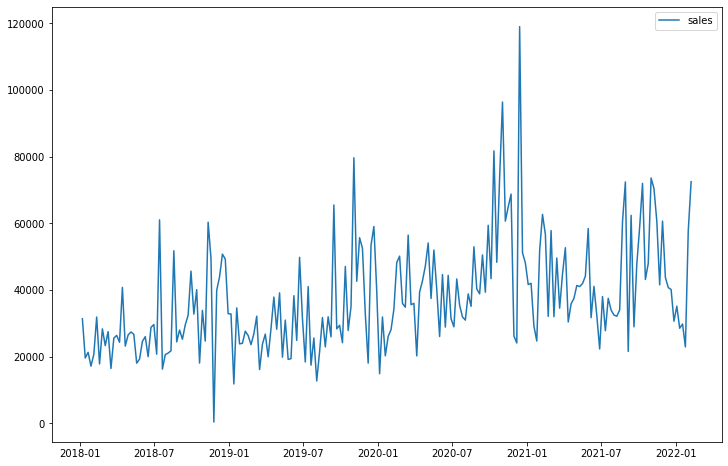

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df_prep[df_prep.srl_num == '1'].date,df_prep[df_prep.srl_num == '1'].sales,label='sales')
# ax.plot(new_fc_df.date,new_fc_df.forecast,color='red',label='forecast')
ax.legend()

In [10]:
df_prep.dtypes

store_number           float64
store_name              object
city                    object
county                  object
date            datetime64[ns]
srl_num                 object
sales                  float64
dtype: object

In [12]:
ex1 = expo(df = df_prep,horizon = 12, date_variable='date',target_variable='sales',field_list=f_list,ts_id='srl_num',seasonal_periods=52,use_boxcox=False)

Forecasting the following store_number                         2106.0
store_name      Hillstreet News and Tobacco
city                            Cedar Falls
county                           BLACK HAWK
srl_num                                  74
Name: 0, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_

Forecasting the following store_number                  2130.0
store_name      Sycamore Convenience
city                        Waterloo
county                    BLACK HAWK
srl_num                           29
Name: 213, dtype: object ...
Forecasting the following store_number                       2190.0
store_name      Central City Liquor, Inc.
city                           Des Moines
county                               POLK
srl_num                                55
Name: 426, dtype: object ...


/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mod

Forecasting the following store_number            2191.0
store_name      Keokuk Spirits
city                    Keokuk
county                     LEE
srl_num                      9
Name: 640, dtype: object ...
Forecasting the following store_number            2285.0
store_name      John's Grocery
city                 Iowa City
county                 JOHNSON
srl_num                     40
Name: 848, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Forecasting the following store_number                         2500.0
store_name      Hy-Vee Food Store #1 / Ames
city                                   Ames
county                                STORY
srl_num                                   3
Name: 1061, dtype: object ...
Forecasting the following store_number               2501.0
store_name      Hy-Vee  #2 / Ames
city                         Ames
county                      STORY
srl_num                         1
Name: 1275, dtype: object ...


/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mod

Forecasting the following store_number                              2502.0
store_name      Hy-Vee Wine and Spirits / Ankeny
city                                      Ankeny
county                                      POLK
srl_num                                        7
Name: 1489, dtype: object ...
Forecasting the following store_number                             2505.0
store_name      Hy-Vee Wine and Spirits / Boone
city                                      Boone
county                                    BOONE
srl_num                                       4
Name: 1703, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                       2506.0
store_name      Hy-Vee #1044 / Burlington
city                           Burlington
county                         DES MOINES
srl_num                                49
Name: 1912, dtype: object ...
Forecasting the following store_number                                 2508.0
store_name      Hy-Vee Food Store #1 / Cedar Rapids
city                                   Cedar Rapids
county                                         LINN
srl_num                                          81
Name: 2122, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                                 2512.0
store_name      Hy-Vee Wine and Spirits / Iowa City
city                                      Iowa City
county                                      JOHNSON
srl_num                                          43
Name: 2335, dtype: object ...
Forecasting the following store_number                              2513.0
store_name      Hy-Vee Food Store #2 / Iowa City
city                                   Iowa City
county                                   JOHNSON
srl_num                                       42
Name: 2549, dtype: object ...


/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mod

Forecasting the following store_number                               2515.0
store_name      Hy-Vee Food Store #1 / Mason City
city                                   Mason City
county                                 CERRO GORD
srl_num                                        65
Name: 2763, dtype: object ...
Forecasting the following store_number                           2517.0
store_name      Hy-Vee Food Store #1 / Newton
city                                   Newton
county                                 JASPER
srl_num                                    12
Name: 2977, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                                2521.0
store_name      Hy-Vee Food and Drug / Grand / WDM
city                               West Des Moines
county                                        POLK
srl_num                                         97
Name: 3190, dtype: object ...
Forecasting the following store_number                                   2522.0
store_name      Hy-Vee Wine and Spirits / Spirit Lake
city                                      Spirit Lake
county                                      DICKINSON
srl_num                                            76
Name: 3403, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                         2524.0
store_name      Hy-Vee Food Store / Dubuque
city                                Dubuque
county                              DUBUQUE
srl_num                                  21
Name: 3617, dtype: object ...
Forecasting the following store_number                               2527.0
store_name      Hy-Vee Food Store #5 / Des Moines
city                                   Des Moines
county                                       POLK
srl_num                                        59
Name: 3831, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas

Forecasting the following store_number                               2528.0
store_name      Hy-Vee Food Store #3 / Des Moines
city                                   Des Moines
county                                       POLK
srl_num                                        58
Name: 4045, dtype: object ...
Forecasting the following store_number                        2535.0
store_name      Hy-Vee Food Store #1 / WDM
city                       West Des Moines
county                                POLK
srl_num                                 94
Name: 4259, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters

Forecasting the following store_number                    2536.0
store_name      HY-VEE / PLEASANT HILL
city                     Pleasant Hill
county                            Polk
srl_num                             87
Name: 4473, dtype: object ...
Forecasting the following store_number                             2538.0
store_name      Hy-Vee Food Store #3 / Waterloo
city                                   Waterloo
county                               BLACK HAWK
srl_num                                      32
Name: 4687, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                            2539.0
store_name      Hy-Vee Food Store / Iowa Falls
city                                Iowa Falls
county                                  HARDIN
srl_num                                     63
Name: 4894, dtype: object ...
Forecasting the following store_number                            2543.0
store_name      Hy-Vee Food Store #1 / Ottumwa
city                                   Ottumwa
county                                 Wapello
srl_num                                     24
Name: 5099, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                              2544.0
store_name      Hy-Vee Food Store / Marshalltown
city                                Marshalltown
county                                  MARSHALL
srl_num                                       85
Name: 5309, dtype: object ...
Forecasting the following store_number                         2548.0
store_name      Hy-Vee Food Store / Altoona
city                                Altoona
county                                 POLK
srl_num                                  14
Name: 5522, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasting the following store_number                           2549.0
store_name      Hy-Vee Food Store / Indianola
city                                Indianola
county                                 WARREN
srl_num                                    39
Name: 5736, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                                 2552.0
store_name      Hy-Vee Food Store #3 / Cedar Rapids
city                                   Cedar Rapids
county                                         LINN
srl_num                                          82
Name: 5949, dtype: object ...
Forecasting the following store_number                        2555.0
store_name      Hy-Vee Food Store / Keokuk
city                                Keokuk
county                                 LEE
srl_num                                 10
Name: 6163, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                                2558.0
store_name      Hy-Vee Food Store / Mount Pleasant
city                                Mount Pleasant
county                                       HENRY
srl_num                                         92
Name: 6371, dtype: object ...
Forecasting the following store_number                        2560.0
store_name      Hy-Vee Food Store / Marion
city                                Marion
county                                LINN
srl_num                                 11
Name: 6579, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                             2561.0
store_name      Hy-Vee Food Store / Fleur / DSM
city                                 Des Moines
county                                     POLK
srl_num                                      57
Name: 6785, dtype: object ...
Forecasting the following store_number                               2565.0
store_name      Hy-Vee Food Store #1636 / Spencer
city                                      Spencer
county                                       CLAY
srl_num                                        25
Name: 6999, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas

Forecasting the following store_number                             2571.0
store_name      Hy-Vee Food Store #2 / Waterloo
city                                   Waterloo
county                               BLACK HAWK
srl_num                                      31
Name: 7185, dtype: object ...
Forecasting the following store_number                             2572.0
store_name      Hy-Vee Food Store / Cedar Falls
city                                Cedar Falls
county                               BLACK HAWK
srl_num                                      75
Name: 7399, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                           2573.0
store_name      Hy-Vee Food Store / Muscatine
city                                Muscatine
county                              MUSCATINE
srl_num                                    44
Name: 7613, dtype: object ...
Forecasting the following store_number                                  2576.0
store_name      Hy-Vee Wine and Spirits / Storm Lake
city                                      Storm Lake
county                                    BUENA VIST
srl_num                                           72
Name: 7820, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                               2582.0
store_name      Hy-Vee #2 Food Store / Mason City
city                                   Mason City
county                                 CERRO GORD
srl_num                                        64
Name: 8033, dtype: object ...
Forecasting the following store_number                          2587.0
store_name      Hy-Vee Food Store / Johnston
city                                Johnston
county                                  POLK
srl_num                                   28
Name: 8244, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                                    2588.0
store_name      Hy-Vee Food and Drug #6 / Cedar Rapids
city                                      Cedar Rapids
county                                            LINN
srl_num                                             84
Name: 8456, dtype: object ...
Forecasting the following store_number                                 2590.0
store_name      Hy-Vee Food Store #5 / Cedar Rapids
city                                   Cedar Rapids
county                                         LINN
srl_num                                          83
Name: 8670, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                                2591.0
store_name      Hy-Vee Wine and Spirits / Atlantic
city                                      Atlantic
county                                        CASS
srl_num                                         27
Name: 8883, dtype: object ...
Forecasting the following store_number                         2593.0
store_name      Hy-Vee Food Store / Carroll
city                                Carroll
county                              CARROLL
srl_num                                  15
Name: 9087, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                            2594.0
store_name      Hy-Vee Food Store / Sioux City
city                                Sioux City
county                                WOODBURY
srl_num                                     69
Name: 9299, dtype: object ...
Forecasting the following store_number                               2595.0
store_name      Hy-Vee Wine and Spirits / Denison
city                                      Denison
county                                   CRAWFORD
srl_num                                        17
Name: 9513, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                                  2603.0
store_name      Hy-Vee Wine and Spirits / Bettendorf
city                                      Bettendorf
county                                         SCOTT
srl_num                                           48
Name: 9726, dtype: object ...
Forecasting the following store_number                                2605.0
store_name      Hy-Vee Drugstore #5 / Cedar Rapids
city                                  Cedar Rapids
county                                        LINN
srl_num                                         80
Name: 9939, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                                   2613.0
store_name      Hy-Vee Food Store #1 / Council Bluffs
city                                   Council Bluffs
county                                     POTTAWATTA
srl_num                                            90
Name: 10152, dtype: object ...
Forecasting the following store_number                                    2614.0
store_name      Hy-Vee #3 Food & Drugstore / Davenport
city                                         Davenport
county                                           SCOTT
srl_num                                             38
Name: 10361, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                            2616.0
store_name      Hy-Vee Food and Drug / Clinton
city                                   Clinton
county                                 CLINTON
srl_num                                     16
Name: 10574, dtype: object ...
Forecasting the following store_number                           2619.0
store_name      Hy-Vee Wine and Spirits / WDM
city                          West Des Moines
county                                   POLK
srl_num                                    96
Name: 10787, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                      2620.0
store_name      Hy-Vee / Windsor Heights
city                     Windsor Heights
county                              Polk
srl_num                               98
Name: 11001, dtype: object ...
Forecasting the following store_number                               2621.0
store_name      Hy-Vee Food Store #3 / Sioux City
city                                   Sioux City
county                                   WOODBURY
srl_num                                        70
Name: 11212, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                           2622.0
store_name      Hy-Vee Food Store / Iowa City
city                                Iowa City
county                                JOHNSON
srl_num                                    41
Name: 11426, dtype: object ...
Forecasting the following store_number                               2623.0
store_name      Hy-Vee Food Store #4 / Sioux City
city                                   Sioux City
county                                   WOODBURY
srl_num                                        71
Name: 11639, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                 2624.0
store_name      Hy-Vee #2 / Dubuque
city                        Dubuque
county                      DUBUQUE
srl_num                          18
Name: 11852, dtype: object ...
Forecasting the following store_number                                  2625.0
store_name      Hy-Vee Wine & Spirits #2 / Davenport
city                                       Davenport
county                                         SCOTT
srl_num                                           37
Name: 12063, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                                 2626.0
store_name      Hy-Vee Drugstore / University / DSM
city                                     Des Moines
county                                         POLK
srl_num                                          61
Name: 12277, dtype: object ...
Forecasting the following store_number                                   2629.0
store_name      Hy-Vee Food Store #2 / Council Bluffs
city                                   Council Bluffs
county                                     POTTAWATTA
srl_num                                            91
Name: 12485, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                          2633.0
store_name      Hy-Vee #3 / BDI / Des Moines
city                              Des Moines
county                                  POLK
srl_num                                   56
Name: 12694, dtype: object ...
Forecasting the following store_number                   2635.0
store_name      Hy-Vee #4 / Davenport
city                        Davenport
county                          SCOTT
srl_num                            34
Name: 12908, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                               2636.0
store_name      Hy-Vee Wine and Spirits / Hubbell
city                                   Des Moines
county                                       POLK
srl_num                                        60
Name: 13119, dtype: object ...
Forecasting the following store_number                   2637.0
store_name      Hy-Vee #5 / Davenport
city                        Davenport
county                          SCOTT
srl_num                            35
Name: 13333, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                             2642.0
store_name      Hy-Vee Wine and Spirits / Pella
city                                      Pella
county                                   MARION
srl_num                                       5
Name: 13546, dtype: object ...
Forecasting the following store_number                                2643.0
store_name      Hy-Vee Wine and Spirits / Waterloo
city                                      Waterloo
county                                  BLACK HAWK
srl_num                                         33
Name: 13759, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                                2644.0
store_name      Hy-Vee Fort Dodge Wine and Spirits
city                                    Fort Dodge
county                                     WEBSTER
srl_num                                         62
Name: 13968, dtype: object ...
Forecasting the following store_number                      2647.0
store_name      Hy-Vee #7 / Cedar Rapids
city                        Cedar Rapids
county                              LINN
srl_num                               78
Name: 14181, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas

Forecasting the following store_number             2648.0
store_name      Hy-Vee #4 / WDM
city            West Des Moines
county                     POLK
srl_num                      93
Name: 14395, dtype: object ...
Forecasting the following store_number                 2649.0
store_name      Hy-Vee #3 / Dubuque
city                        Dubuque
county                      DUBUQUE
srl_num                          19
Name: 14610, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number              2651.0
store_name      Hy-Vee / Waverly
city                     Waverly
county                    BREMER
srl_num                       26
Name: 14823, dtype: object ...
Forecasting the following store_number                               2662.0
store_name      Hy-Vee Wine & Spirits / Muscatine
city                                    Muscatine
county                                  MUSCATINE
srl_num                                        45
Name: 15031, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                           2663.0
store_name      Hy-Vee Food Store / Urbandale
city                                Urbandale
county                                   POLK
srl_num                                    46
Name: 15237, dtype: object ...
Forecasting the following store_number             2665.0
store_name      Hy-Vee / Waukee
city                     Waukee
county                   DALLAS
srl_num                      13
Name: 15450, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas

Forecasting the following store_number                                 2666.0
store_name      Hy-Vee Food Store #2 / State Ankeny
city                                         Ankeny
county                                         POLK
srl_num                                           8
Name: 15664, dtype: object ...
Forecasting the following store_number                                 2666.0
store_name      Hy-Vee Food Store #2 / State Ankeny
city                                         Ankeny
county                                         Polk
srl_num                                         110
Name: 15797, dtype: object ...
Forecasting the following store_number                            2670.0
store_name      Hy-Vee Food Store / Coralville
city                                Coralville
county                                 JOHNSON
srl_num                                     51
Name: 15875, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                    2673.0
store_name      Hy-Vee # 6/ Des Moines
city                        Des Moines
county                            POLK
srl_num                             54
Name: 16089, dtype: object ...
Forecasting the following store_number                         3354.0
store_name      Sam's Club 8238 / Davenport
city                              Davenport
county                                SCOTT
srl_num                                  36
Name: 16301, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                            3385.0
store_name      Sam's Club 8162 / Cedar Rapids
city                              Cedar Rapids
county                                    LINN
srl_num                                     79
Name: 16513, dtype: object ...
Forecasting the following store_number                   3390.0
store_name      Okoboji Avenue Liquor
city                          Milford
county                      DICKINSON
srl_num                            22
Name: 16726, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                               3420.0
store_name      Sam's Club 6344 / Windsor Heights
city                              Windsor Heights
county                                       Polk
srl_num                                        99
Name: 16940, dtype: object ...
Forecasting the following store_number                          3447.0
store_name      Sam's Club 6432 / Sioux City
city                              Sioux City
county                              WOODBURY
srl_num                                   68
Name: 17146, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_

Forecasting the following store_number                              3477.0
store_name      Sam's Club 6472 / Council Bluffs
city                              Council Bluffs
county                                POTTAWATTA
srl_num                                       89
Name: 17357, dtype: object ...
Forecasting the following store_number                        3494.0
store_name      Sam's Club 6514 / Waterloo
city                              Waterloo
county                          BLACK HAWK
srl_num                                 30
Name: 17568, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                    3524.0
store_name      Sam's Club 6568 / Ames
city                              Ames
county                           STORY
srl_num                              2
Name: 17777, dtype: object ...
Forecasting the following store_number               3773.0
store_name      Benz Distributing
city                 Cedar Rapids
county                       LINN
srl_num                        77
Name: 17990, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                         3814.0
store_name      Costco Wholesale #788 / WDM
city                        West Des Moines
county                               Dallas
srl_num                                  95
Name: 18207, dtype: object ...
Forecasting the following store_number                         3820.0
store_name      Charlie's Wine and Spirits,
city                             Sioux City
county                             WOODBURY
srl_num                                  67
Name: 18405, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages

Forecasting the following store_number                       3944.0
store_name      Sam's Club 4973 / Dubuque
city                              Dubuque
county                            DUBUQUE
srl_num                                20
Name: 18619, dtype: object ...
Forecasting the following store_number           3952.0
store_name      Lot-A-Spirits
city               Bettendorf
county                  SCOTT
srl_num                    47
Name: 18832, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number             4129.0
store_name      Cyclone Liquors
city                       Ames
county                    STORY
srl_num                       0
Name: 19044, dtype: object ...
Forecasting the following store_number                          4312.0
store_name      I-80 Liquor / Council Bluffs
city                          Council Bluffs
county                            POTTAWATTA
srl_num                                   88
Name: 19258, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number                                 4677.0
store_name      Costco Wholesale #1111 / Coralville
city                                     Coralville
county                                      JOHNSON
srl_num                                          52
Name: 19466, dtype: object ...
Forecasting the following store_number            4829.0
store_name      Central City 2
city                Des Moines
county                    POLK
srl_num                     53
Name: 19660, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_

Forecasting the following store_number                           4969.0
store_name      Lake Liquors Wine and Spirits
city                               Clear Lake
county                             CERRO GORD
srl_num                                    50
Name: 19873, dtype: object ...
Forecasting the following store_number                           4969.0
store_name      Lake Liquors Wine and Spirits
city                               Clear Lake
county                             Cerro Gord
srl_num                                   105
Name: 20006, dtype: object ...
Forecasting the following store_number                    4988.0
store_name      Happy's Wine & Spirits
city                       Cedar Falls
county                      BLACK HAWK
srl_num                             73
Name: 20084, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number            5102.0
store_name      Wilkie Liquors
city              Mount Vernon
county                    LINN
srl_num                     86
Name: 20297, dtype: object ...
Forecasting the following store_number                      5144.0
store_name      Sam's Club 6979 / Ankeny
city                              Ankeny
county                              POLK
srl_num                                6
Name: 20511, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

Forecasting the following store_number               5257.0
store_name      MAD Ave Quik Shop
city                      Ottumwa
county                    WAPELLO
srl_num                        23
Name: 20720, dtype: object ...
Forecasting the following store_number             5351.0
store_name      Downtown Liquor
city                 Sioux City
county                 WOODBURY
srl_num                      66
Name: 20934, dtype: object ...
Forecasting the following store_number                         2565.0
store_name      Hy-Vee Food Store / Spencer
city                                Spencer
county                                 CLAY
srl_num                                 101
Name: 21145, dtype: object ...
final fc df         date      forecast srl_num  store_number                   store_name  \
0 2022-02-13  17471.622359      74        2106.0  Hillstreet News and Tobacco   
1 2022-02-20  13975.493124      74        2106.0  Hillstreet News and Tobacco   
2 2022-02-27  16123.5276

/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/ba

In [14]:
fcast1 = ex1.forecast

In [15]:
fcast1.head()

,date,forecast,srl_num,store_number,store_name,city,county
0,2022-02-13,17471.622359,74,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK
1,2022-02-20,13975.493124,74,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK
2,2022-02-27,16123.527605,74,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK
3,2022-03-06,16522.966457,74,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK
4,2022-03-13,16727.444455,74,2106.0,Hillstreet News and Tobacco,Cedar Falls,BLACK HAWK


In [16]:
df

,date,store_number,store_name,city,county,sales
0,2022-01-09,4129,Cyclone Liquors,Ames,STORY,3570.58
1,2022-01-16,4129,Cyclone Liquors,Ames,STORY,13461.98
2,2022-01-23,4129,Cyclone Liquors,Ames,STORY,12398.75
3,2022-01-30,4129,Cyclone Liquors,Ames,STORY,15761.38
4,2022-02-06,4129,Cyclone Liquors,Ames,STORY,14926.81
...,...,...,...,...,...,...
21187,2019-03-24,2588,Hy-Vee Food and Drug #6 / Cedar Rapids,Cedar Rapids,LINN,11009.05
21188,2019-07-07,2588,Hy-Vee Food and Drug #6 / Cedar Rapids,Cedar Rapids,LINN,13782.98
21189,2019-10-06,2588,Hy-Vee Food and Drug #6 / Cedar Rapids,Cedar Rapids,LINN,11923.47
21190,2019-05-05,2588,Hy-Vee Food and Drug #6 / Cedar Rapids,Cedar Rapids,LINN,32141.39


In [17]:
## Need to deploy and use function to plot by series
srl = '1'
fc_temp = fcast1[fcast1.srl_num == srl]
df_temp = df_prep[df_prep.srl_num == srl]

In [18]:
df_temp.head()

,store_number,store_name,city,county,date,srl_num,sales
1275,2501.0,Hy-Vee #2 / Ames,Ames,STORY,2018-01-07,1,31348.66
1276,2501.0,Hy-Vee #2 / Ames,Ames,STORY,2018-01-14,1,19585.41
1277,2501.0,Hy-Vee #2 / Ames,Ames,STORY,2018-01-21,1,21286.85
1278,2501.0,Hy-Vee #2 / Ames,Ames,STORY,2018-01-28,1,17127.81
1279,2501.0,Hy-Vee #2 / Ames,Ames,STORY,2018-02-04,1,20653.26


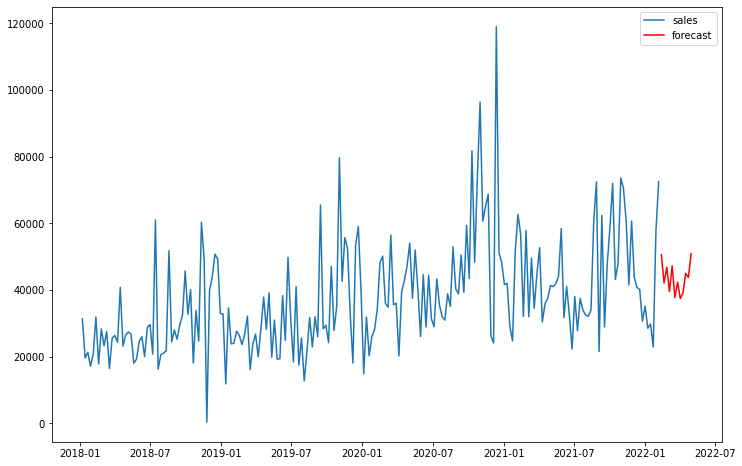

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df_temp.date,df_temp.sales,label='sales')
ax.plot(fc_temp.date,fc_temp.forecast,color='red',label='forecast')
ax.legend()